<a href="https://colab.research.google.com/github/ridvanyigit/My-Projects/blob/main/carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# Import necessary libraries for data processing, visualization, and machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
# Load the dataset from a CSV file
df = pd.read_csv('carprice.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [102]:
# Display all unique values in the 'normalized-losses' column
# This helps in identifying the different categories or numerical values
# present in this feature, which may include missing values or outliers.
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '129', '115', '93', '142', '161', '153', '125', '128', '122',
       '103', '168', '108', '194', '231', '119', '154', '74', '186',
       '150', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [103]:
# Display all unique values in the 'make' column
# This reveals the different car manufacturers (brands) present in the dataset.
# Understanding the distinct values can be useful for categorical encoding or analysis.
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [104]:
# Drop columns that are not useful for regression (like ID columns, etc.)
# Here, 'symboling', 'normalized-losses', and 'engine-location' are dropped as they might not contribute significantly to the model.
df = df.drop(columns=['symboling', 'normalized-losses', 'engine-location'])

# Replace '?' with NaN and drop missing values to clean the dataset
df = df.replace('?', np.nan)
df = df.dropna()

# Display the cleaned data to check the changes
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [105]:
# Define the categorical features that need to be encoded
categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors',
                        'body-style', 'drive-wheels', 'engine-type', 'fuel-system']

# Define the numerical features that will be standardized
numerical_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight',
                      'engine-size', 'bore', 'stroke', 'compression-ratio',
                      'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

In [106]:
# The target variable is 'price'
y = df['price'].astype(float)

# The features are all columns except 'price'
X = df.drop(columns=['price'])

In [107]:
# Set up a ColumnTransformer to apply standardization to numerical features
# and One-Hot Encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Create a pipeline that first preprocesses the data and then can be used to fit a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [108]:
# Split the dataset into training and testing sets
# 80% of the data is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Apply the pipeline to the training data
X_train = pipeline.fit_transform(X_train)

# Apply the pipeline to the testing data
X_test = pipeline.transform(X_test)

In [110]:
# Initialize the SVR model with a radial basis function (RBF) kernel
svr_model = SVR(kernel='rbf')

# Train the SVR model on the preprocessed training data
svr_model.fit(X_train, y_train)

# Predict the target values for the test set using the trained SVR model
y_pred_svr = svr_model.predict(X_test)

In [111]:
# Calculate the Mean Squared Error (MSE) and R-squared value for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the evaluation metrics
print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR R-Squared: {r2_svr}')

SVR Mean Squared Error: 121645899.68099643
SVR R-Squared: -0.0825005237582368


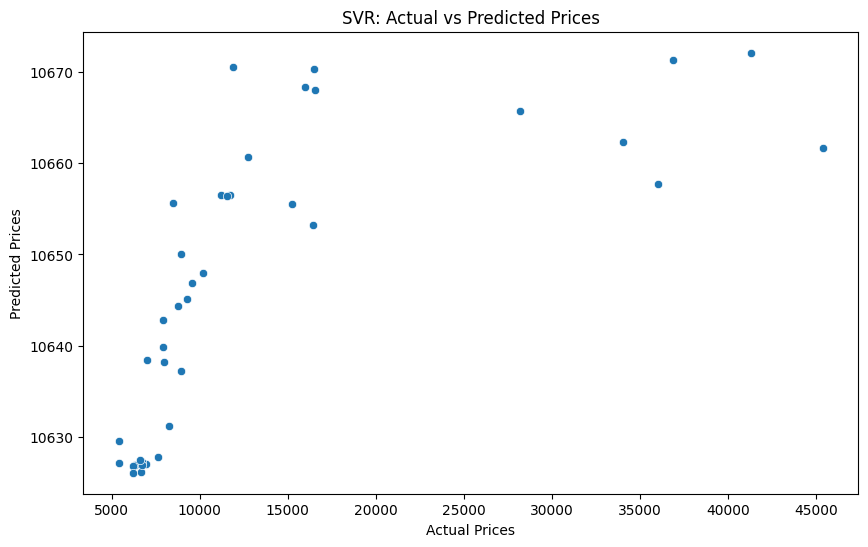

In [112]:
# Create a scatter plot to visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_svr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR: Actual vs Predicted Prices')
plt.show()

In [113]:
# Initialize the Random Forest Regressor with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the preprocessed training data
rf_model.fit(X_train, y_train)

# Predict the target values for the test set using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

In [114]:
# Calculate the Mean Squared Error (MSE) and R-squared value for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-Squared: {r2_rf}')

Random Forest Mean Squared Error: 7918580.552864528
Random Forest R-Squared: 0.9295342661086279


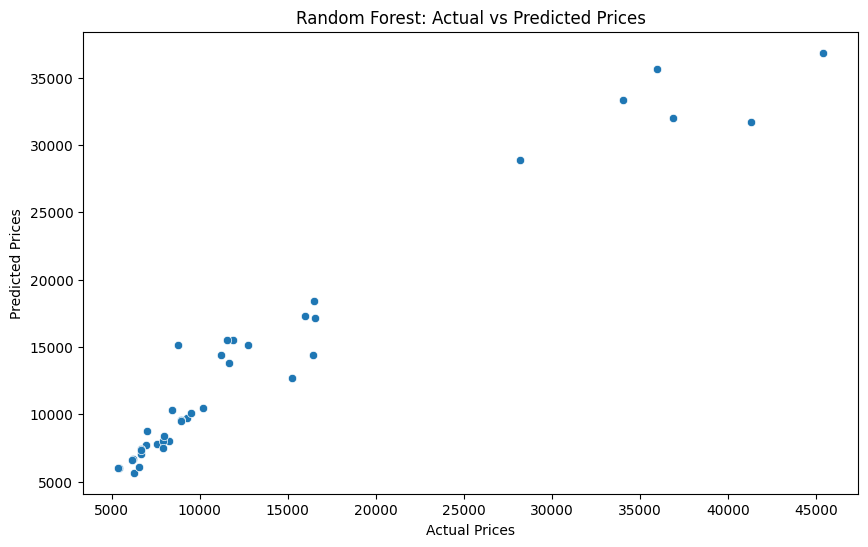

In [115]:
# Create a scatter plot to visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

In [116]:
# Create a DataFrame to compare the actual, SVR predicted, and Random Forest predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'SVR_Predicted': y_pred_svr,
    'RandomForest_Predicted': y_pred_rf
})

# Display the first few rows of the comparison DataFrame
comparison_df.head()

,Actual,SVR_Predicted,RandomForest_Predicted
49,36000.0,10657.704360,35643.650000
143,11694.0,10656.508855,13778.581667
81,6989.0,10638.471423,8747.230000
150,6938.0,10627.104616,7686.880000
118,7609.0,10627.872813,7790.700000


In [117]:
# Example input for a single car's features
# This input should match the features used in training the model
# Example: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
#           'drive-wheels', 'engine-type', 'fuel-system', 'wheel-base',
#           'length', 'width', 'height', 'curb-weight', 'engine-size',
#           'bore', 'stroke', 'compression-ratio', 'horsepower',
#           'peak-rpm', 'city-mpg', 'highway-mpg']

single_car_data = pd.DataFrame([{
    'make': 'toyota',
    'fuel-type': 'gas',
    'aspiration': 'std',
    'num-of-doors': 'four',
    'body-style': 'sedan',
    'drive-wheels': 'fwd',
    'engine-type': 'ohc',
    'fuel-system': 'mpfi',
    'wheel-base': 102.4,
    'length': 175.6,
    'width': 66.5,
    'height': 54.1,
    'curb-weight': 2500,
    'engine-size': 120,
    'bore': 3.19,
    'stroke': 3.40,
    'compression-ratio': 9.0,
    'horsepower': 110,
    'peak-rpm': 5200,
    'city-mpg': 24,
    'highway-mpg': 30
}])

In [118]:
# Apply the same preprocessing steps as for the training data
# This includes encoding categorical features and scaling numerical features
single_car_preprocessed = pipeline.transform(single_car_data)

In [119]:
# Predict the price using the trained SVR model
predicted_price_svr = svr_model.predict(single_car_preprocessed)
print(f'Predicted Price using SVR: ${predicted_price_svr[0]:.2f}')

Predicted Price using SVR: $10651.09


In [120]:
# Predict the price using the trained Random Forest model
predicted_price_rf = rf_model.predict(single_car_preprocessed)
print(f'Predicted Price using Random Forest: ${predicted_price_rf[0]:.2f}')

Predicted Price using Random Forest: $11448.26
